# CAB420 Assignment 1A Question 3: Template and Utilities Demo
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a quick demo and overview of the provided utility functions to help with Assignment 1A, Question 3.

It also implements the SVM that you are to compare against when responsing to the question.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

## Utility Functions

The following cell contains utility functions to:
* Load the data
* Vectorise the data
* Plot images
* Resize all images
* Convert images to grayscale

These are provided to assist you in developing your solution.

In [1]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, AveragePooling2D, Input, Flatten
from keras import activations
from keras.regularizers import l2

from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.utils import to_categorical

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, val_path, test_path):

    # load files
    train = loadmat(train_path)
    val = loadmat(val_path)
    test = loadmat(test_path)

    # pull out training set and scale X data
    train_X = train['train_X'] / 255.0
    train_Y = train['train_y'].reshape(-1)

    # pull out validation set and scale X data
    val_X = val['val_X'] / 255.0
    val_Y = val['val_y'].reshape(-1)

    # pull out test set and scale X data
    test_X = test['test_X'] / 255.0
    test_Y = test['test_y'].reshape(-1)

    # return loaded data
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)

## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.

(1000, 32, 32, 3)
(1000,)
(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


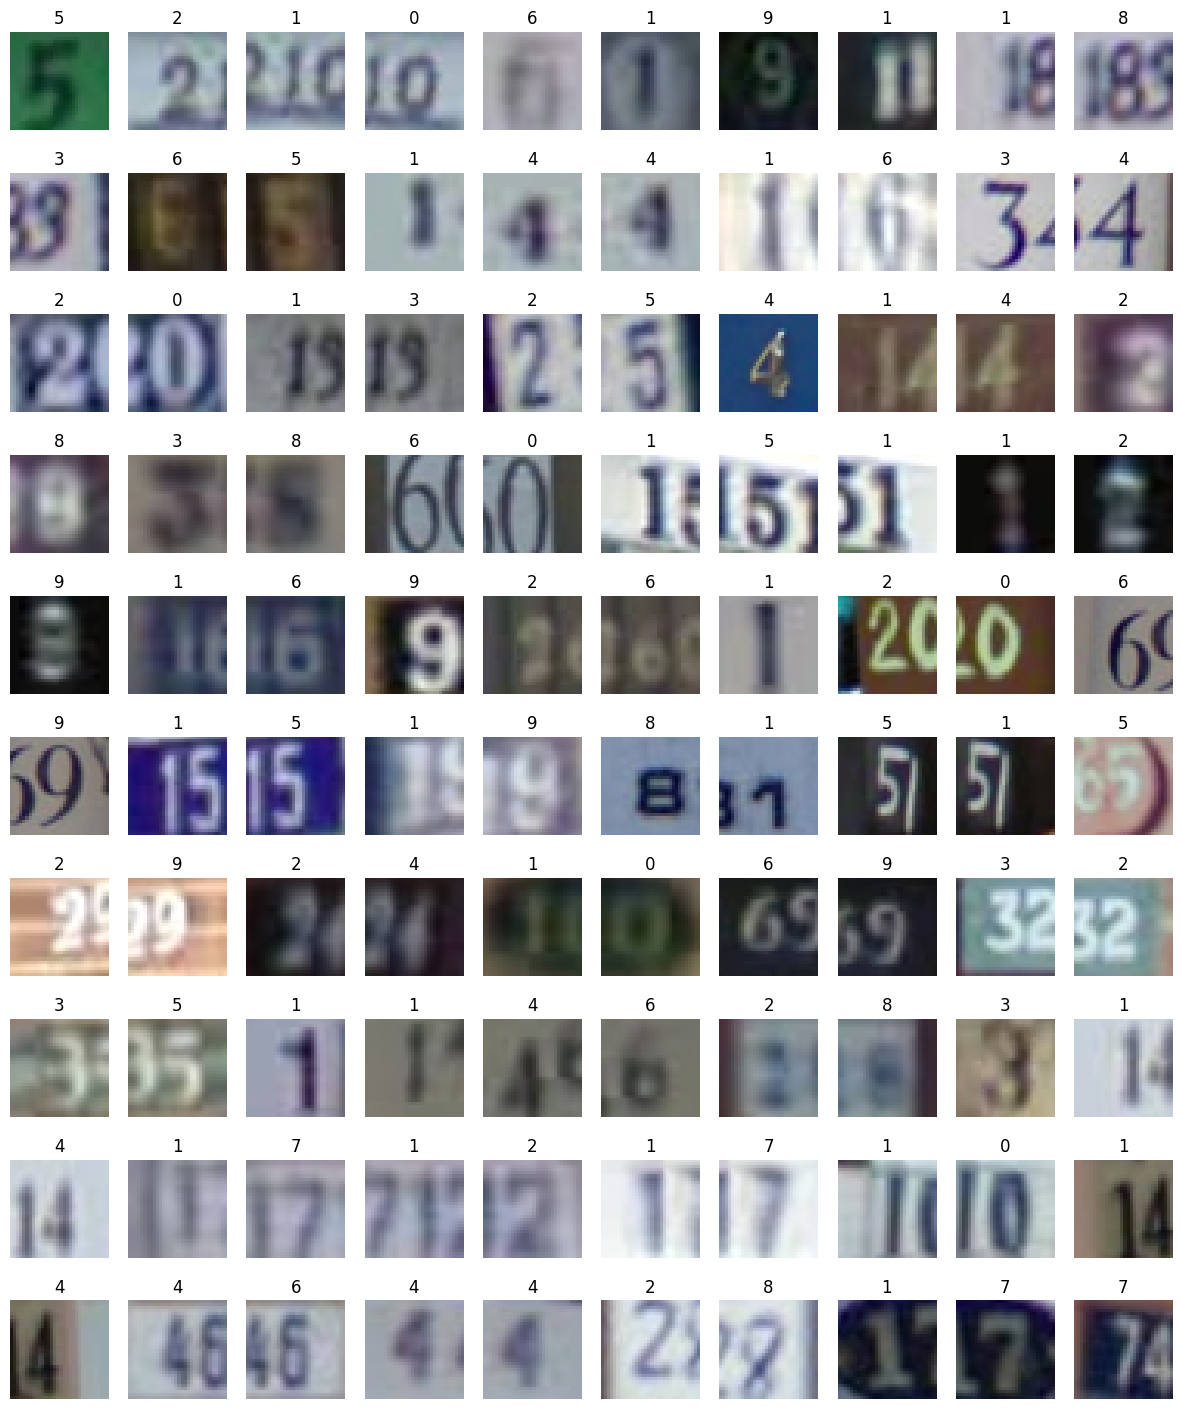

In [2]:
train_X, train_Y, val_X, val_Y, test_X, test_Y = load_data(r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_train.mat', 
                                                           r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_validation.mat', 
                                                           r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_test.mat')

# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.

In [3]:
train_vector_X = vectorise(train_X)
val_vector_X = vectorise(val_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(val_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:
* Resize images
* Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.

(1000, 20, 20, 1)


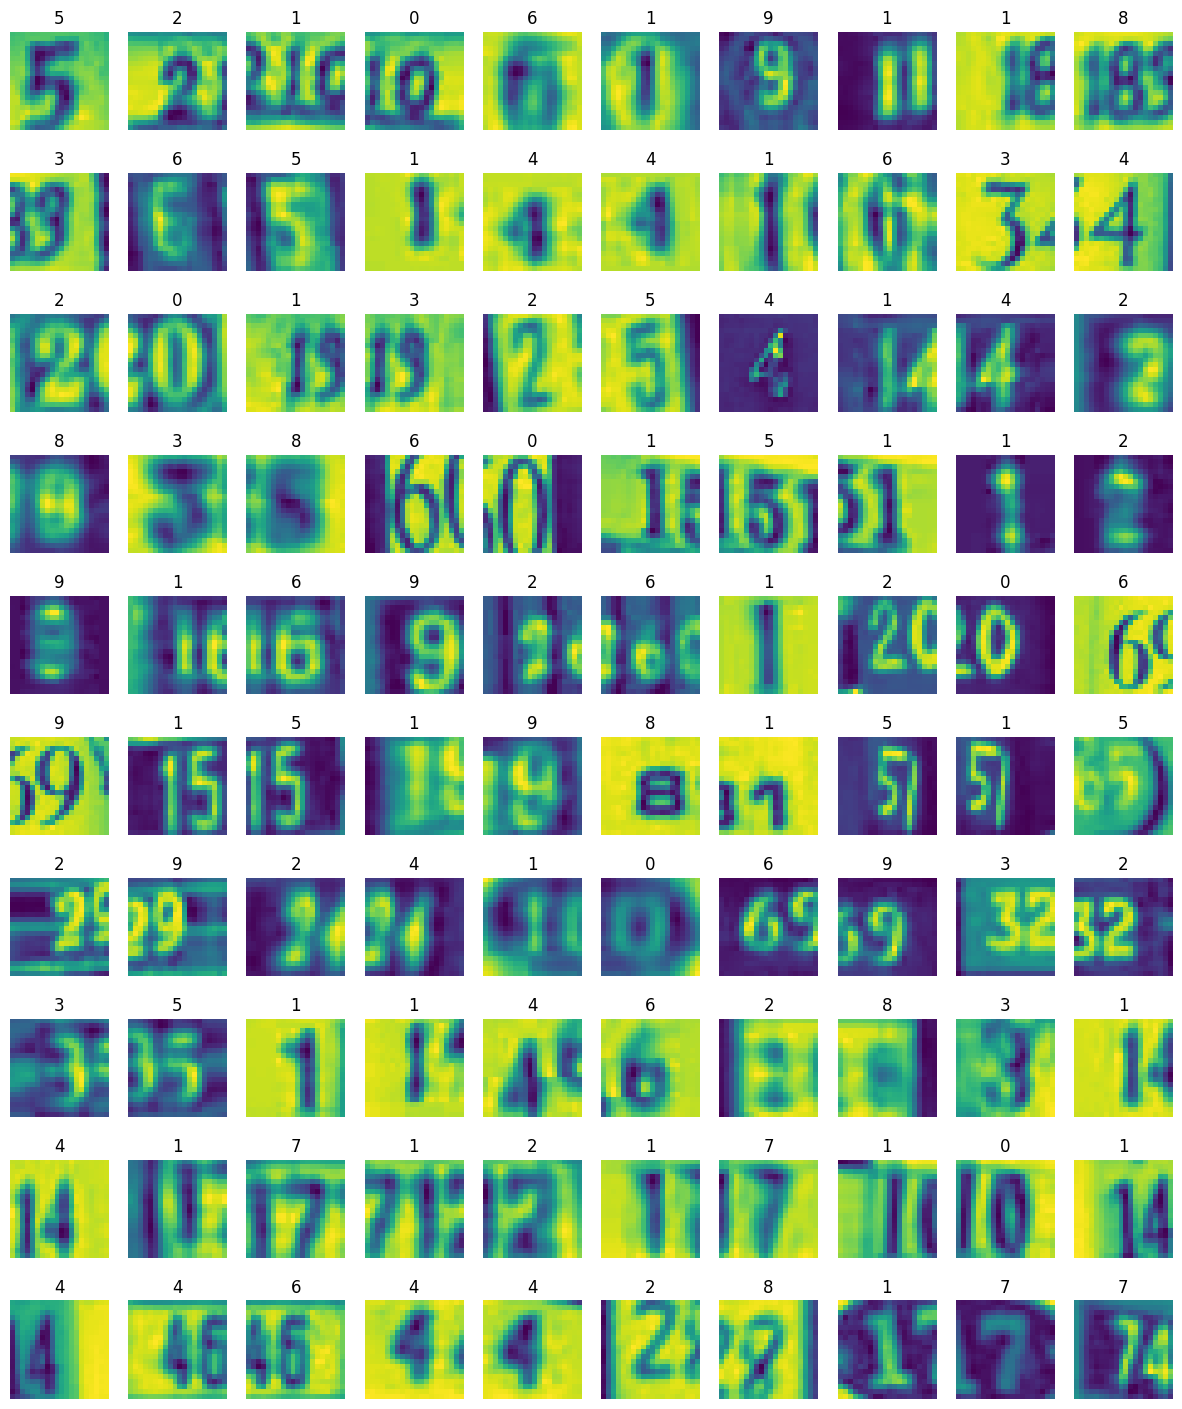

In [4]:
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use ``process_time`` within the ``time`` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:

In [5]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y,val_X, val_Y, test_X, test_Y = load_data(r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_train.mat', 
                                                          r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_validation.mat', 
                                                          r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.078125 seconds
Time to resize data: 0.015625 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.10      0.14      0.12       686
           1       0.29      0.41      0.34      1969
           2       0.21      0.24      0.22      1629
           3       0.19      0.17      0.18      1108
           4       0.13      0.12      0.12       966
           5       0.13      0.10      0.11       902
           6       0.10      0.06      0.08       765
           7       0.11      0.08      0.09       757
           8       0.08      0.04      0.05       603
           9       0.11      0.08      0.10       615

    accuracy                           0.19     10000
   macro avg       0.14      0.14      0.14     10000
weighted avg       0.17      0.19      0.17     10000



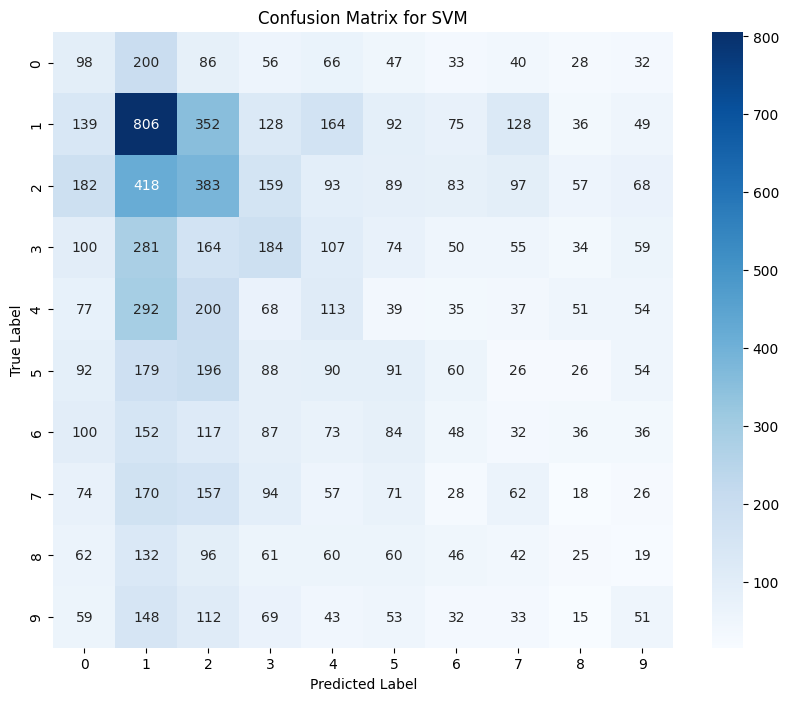


SVM Performance Metrics:
Training Time: 1.25 seconds
Inference Time (training set): 0.39 seconds
Inference Time (testing set): 3.91 seconds


In [ ]:
from sklearn.svm import SVC
from time import process_time
# for the confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load data
train_X, train_Y,val_X, val_Y, test_X, test_Y = load_data(r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_train.mat', 
                                                          r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_validation.mat', 
                                                          r'C:\Users\milly\Desktop\CAB420\Data\Q3\q3_test.mat')

# any resize, colour change, etc, would go here
# if you do anything, do the same thing to the training, validation, and test sets

# vectorise data
# If you do any resize, reshape, etc of the data prior to putting this into your DCNN, change this code to 
# vectorise that verison of the data. The same data should be used by all models for a fair comparison; though
# you will only vectorise the data for the SVM (i.e. the DCNN will get the data as images).
train_vector_X = vectorise(train_X)
val_vector_X = vectorise(val_X)
test_vector_X = vectorise(test_X)

# train the SVM
# Note that you are not required to tune the SVM, just use it as it is. This also means that we do not need the validation
# set for the SVM as we're not selecting hyper-parameters
# measure the start time of training
svm_train_start = process_time()
# run the training - note that you don't need to change any parameters here except potentially for the input data is you 
# resize, change colour, etc
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y)
# record the end time of the training
svm_train_end = process_time()
# predict on the training set
train_predictions = svm.predict(train_vector_X)
# measure of the time of the training set prediction
svm_train_pred_end = process_time()
# predict on the test set
test_predictions = svm.predict(test_vector_X)
# measure the end time on the prediction of the test set
svm_test_pred_end = process_time()

# check how long the SVM took to train
svm_train_time = svm_train_end - svm_train_start
# check how long the SVM took to perform inference on the training set
svm_inference_train_time = svm_train_pred_end - svm_train_end
# check how long the SVM took to perform inference on the testing set
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end

# evaluate SVM
# here you can insert whatever evaluation metrics you feel are appropriate, though F1 and a confusion matrix would be a fair
# option

# Generate classification report
print("Classification Report for SVM:")
print(classification_report(test_Y, test_predictions))

# Generate and plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_Y, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), 
            yticklabels=range(10))
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print timing information again for reference
print('\nSVM Performance Metrics:')
print(f'Training Time: {svm_train_time:.2f} seconds')
print(f'Inference Time (training set): {svm_inference_train_time:.2f} seconds')
print(f'Inference Time (testing set): {svm_inference_test_time:.2f} seconds')


Training Baseline Model:
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1498 - loss: 3.6027 - precision: 0.1501 - recall: 0.0684 - val_accuracy: 0.1430 - val_loss: 2.2973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1290 - loss: 2.3591 - precision: 0.1501 - recall: 0.0050 - val_accuracy: 0.1580 - val_loss: 2.2930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1750 - loss: 2.2718 - precision: 0.4608 - recall: 0.0032 - val_accuracy: 0.1380 - val_loss: 2.2767 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1839 - loss: 2.2656 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1370 - val_loss: 2.2705 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.001

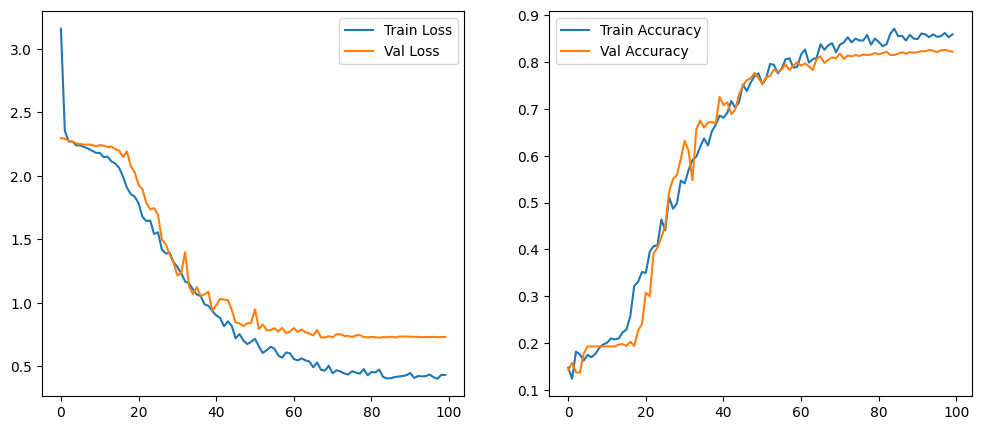


Test Accuracy: 0.8247
Test Precision: 0.8721
Test Recall: 0.7907
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


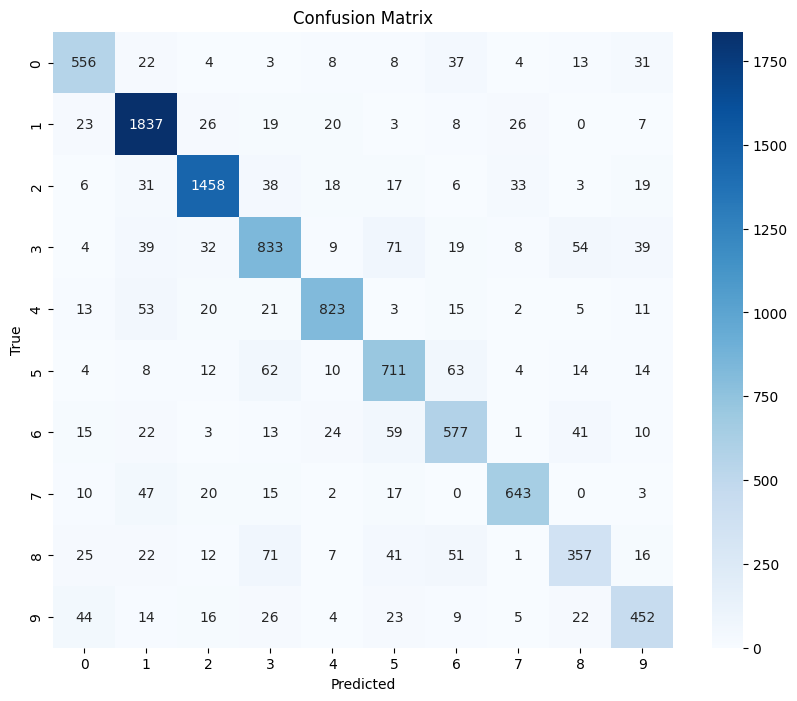


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       686
           1       0.88      0.93      0.90      1969
           2       0.91      0.90      0.90      1629
           3       0.76      0.75      0.75      1108
           4       0.89      0.85      0.87       966
           5       0.75      0.79      0.77       902
           6       0.74      0.75      0.74       765
           7       0.88      0.85      0.87       757
           8       0.70      0.59      0.64       603
           9       0.75      0.73      0.74       615

    accuracy                           0.82     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.82      0.82      0.82     10000

Baseline Model Training Time: 229.92 seconds

Training Augmented Model:
Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1279 - loss: 3.3791 - precision: 0.1300 - recall: 0.0540 - val_accuracy: 0.1430

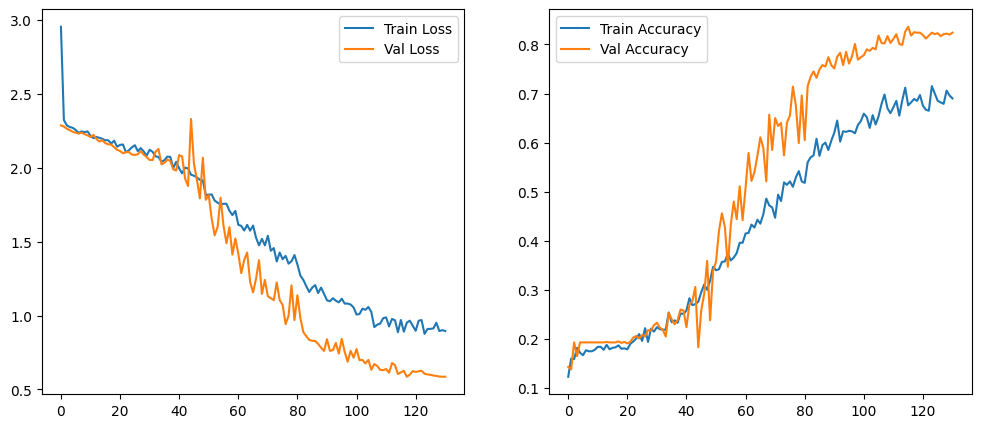


Test Accuracy: 0.8369
Test Precision: 0.9170
Test Recall: 0.7547
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


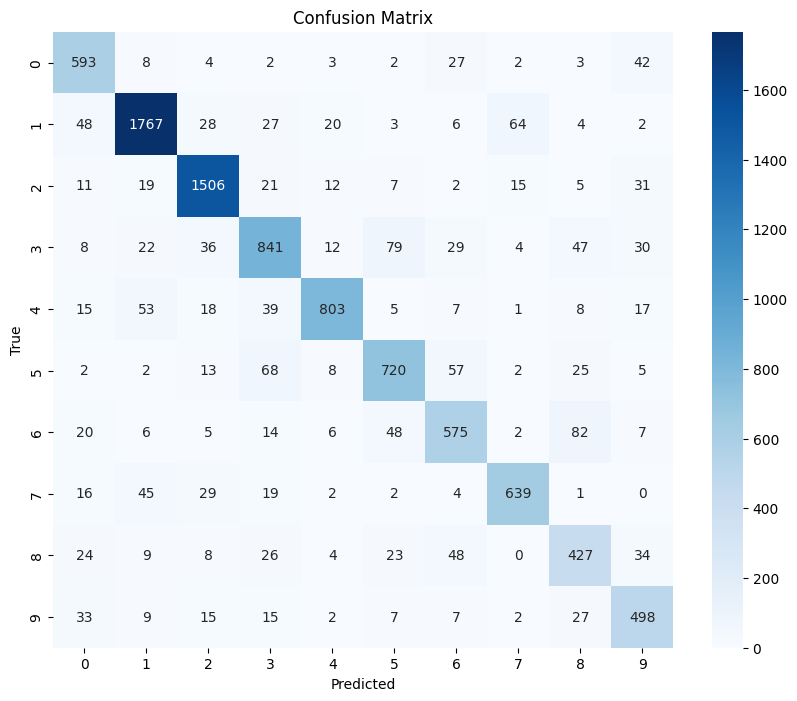


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       686
           1       0.91      0.90      0.90      1969
           2       0.91      0.92      0.92      1629
           3       0.78      0.76      0.77      1108
           4       0.92      0.83      0.87       966
           5       0.80      0.80      0.80       902
           6       0.75      0.75      0.75       765
           7       0.87      0.84      0.86       757
           8       0.68      0.71      0.69       603
           9       0.75      0.81      0.78       615

    accuracy                           0.84     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.84      0.84      0.84     10000

Augmented Model Training Time: 356.52 seconds


In [ ]:
# develop, evaluate and compare DCNNs
#
# You should create one DCNN which you will train from scratch, and then add augmentation to this and train it again.
# Use whatever augmentation you feel is appropraite.
#
# For your DCNN design, feel free to borrow networks from pracs and lecture examples. The network does not need to be
# overly complex, but you should briefly explain your selection of this model. You should avoid networks so simple 
# that they perform very badly. Look at the lecture notes and the sort of simple DCNNs we've created as a guide. With 
# respect to training time, there is no minimum or maximum training time, but you should either:
#  - Train both your models to convergence, noting that this may take different numbers of epochs
#  - Train your networks for the same period of time, ensuring that this time is sufficient for at least one to converge
# Keep in mind that with the very small training set, you may need to increase the number of epochs compared to what we
# see in the lecture examples

# 1. Data Loading and Augmentation
def load_data(train_path, val_path, test_path):
    """Improved data loading with validation"""
    def process_data(data):
        X = data['X'].astype('float32') / 255.0
        X = X.reshape(-1, 32, 32, 3)
        y = data['y'].flatten()
        y = np.where(y == 10, 0, y)  # Convert 10 to 0
        return X, y

    train_X, train_Y = process_data(loadmat(train_path))
    val_X, val_Y = process_data(loadmat(val_path))
    test_X, test_Y = process_data(loadmat(test_path))
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

def create_augmentation():
    """Enhanced augmentation pipeline"""
    return keras.Sequential([
        layers.RandomRotation(0.1),  # Increased rotation range
        layers.RandomZoom(0.2),      # Increased zoom range
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomContrast(0.1),
        layers.GaussianNoise(0.01)   # Added noise for robustness
    ], name="augmentation")

# 2. Model Architecture
def create_enhanced_model():
    """Improved CNN with BatchNorm and Dropout"""
    inputs = keras.Input(shape=(32, 32, 3), name='img')
    
    # Block 1
    x = layers.Conv2D(16, (3,3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(16, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block 2
    x = layers.Conv2D(32, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.3)(x)
    
    # Block 3
    x = layers.Conv2D(64, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)
    
    # Classifier
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    return keras.Model(inputs, outputs, name='enhanced_cnn')

# 3. Enhanced Training and Evaluation
def get_callbacks():
    """Improved training callbacks"""
    return [
        keras.callbacks.EarlyStopping(
            patience=15,
            restore_best_weights=True,
            monitor='val_accuracy'
        ),
        keras.callbacks.ReduceLROnPlateau(
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            monitor='val_loss'
        )
    ]

def compile_model(model):
    """Enhanced model compilation"""
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy',
                keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall')]
    )

def train_and_evaluate(model, train_data, val_data, test_data, epochs=100):
    """Complete training and evaluation pipeline"""
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=get_callbacks(),
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.show()
    
    # Evaluate on test set
    test_results = model.evaluate(test_data, verbose=0)
    print(f"\nTest Accuracy: {test_results[1]:.4f}")
    print(f"Test Precision: {test_results[2]:.4f}")
    print(f"Test Recall: {test_results[3]:.4f}")
    
    # Confusion matrix
    y_pred = model.predict(test_data)
    y_true = np.concatenate([y for x, y in test_data], axis=0)
    cm = tf.math.confusion_matrix(
        np.argmax(y_true, axis=1),
        np.argmax(y_pred, axis=1)
    )
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(
        np.argmax(y_true, axis=1),
        np.argmax(y_pred, axis=1),
        target_names=[str(i) for i in range(10)]
    ))


# Convert to categorical
train_Y = keras.utils.to_categorical(train_Y, 10)
val_Y = keras.utils.to_categorical(val_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

# Create datasets
augmentation = create_augmentation()

# Baseline model (no augmentation)
train_ds = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
train_ds = train_ds.shuffle(1000).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_X, val_Y))
val_ds = val_ds.batch(64).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_X, test_Y))
test_ds = test_ds.batch(64).prefetch(tf.data.AUTOTUNE)

# Train baseline model
print("\nTraining Baseline Model:")
time_baseline_start = process_time()
baseline_model = create_enhanced_model()
compile_model(baseline_model)
train_and_evaluate(baseline_model, train_ds, val_ds, test_ds)
time_baseline_end = process_time()
print(f"Baseline Model Training Time: {time_baseline_end - time_baseline_start:.2f} seconds")

# Augmented model
print("\nTraining Augmented Model:")
time_augmented_start = process_time()
aug_train_ds = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
aug_train_ds = aug_train_ds.map(
    lambda x, y: (augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)
aug_train_ds = aug_train_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

augmented_model = create_enhanced_model()
compile_model(augmented_model)
train_and_evaluate(augmented_model, aug_train_ds, val_ds, test_ds, epochs=150)
time_augmented_end = process_time()
print(f"Augmented Model Training Time: {time_augmented_end - time_augmented_start:.2f} seconds")

In [8]:
# For your write-up, you should include:
# - briefly mention any pre-processing you did and why
# - outline your network design, and training approach. The discussion of training should note how long the model was trained
#   for, and if it converged. If you observe the non-augmented and augmented networks training at different rates, discuss that
#   here
# - outline your data augmentation, and briefly justify why these methods were chosen.
# - an evaluation and comparison of three models, which should highlight any differences observed between the models, and the
#   inference time of the three models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions.
# Note that figures and tables are not included in the page limits.
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT